In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np

# Idea general

Esta se basa en encontrar el maximo/minimo local de una funcion por medio del gradiente -el cual nos indica la "pendiente" en cada eje sobre un punto dado. Si bien la idea es sencilla, llevarlo a la realidad es un poco mas complejo y no hay una receta unica para lograrlo. En este ensayo trataremos de abordar este problema de manera intuitiva

## Una variable
Empecemos abordando un caso sencillo, una funcion de una variable $f(x) = sin(x)$ -cabe aclarar que no tiene sentido tratar de maximizar/minimizar un funcion que no este acotada sobre el dominio de nuestro interes-, Empecemos restringiendo esta, al dominio $[0, 2 \pi]$ y eligamos un punto arbitrario, por ejemplo $x_{0}=\frac{7}{2}$
<center><img src="Imagenes/sin_plot.jpg"></center>


# Apendice


### Funcion $sin(x)$

''

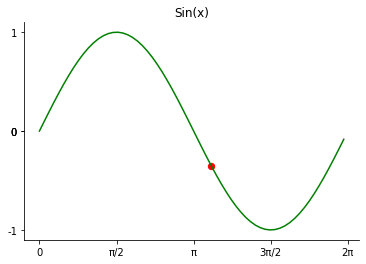

In [62]:
plt.title("Sin(x)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
x_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
x_labels = ['0', 'π/2', 'π', '3π/2', '2π']
plt.xticks(x_ticks, x_labels)
y_ticks = [0, 1, 0, -1, 0]
y_labels = ["0", "1", "0", "-1", "0"]
plt.yticks(y_ticks, y_labels)
sin_X_data = np.arange(0, 2*np.pi, 0.1)
sin_Y_data = np.sin(sin_X_data)
plt.plot(sin_X_data, sin_Y_data, c="green")
plt.scatter(3.5, np.sin(3.5), c="red", s=40, alpha=1)
plt.savefig("imagenes/sin_plot.jpg", bbox_inches = "tight")
;




Generamos una superficie en 3D. Para este ejemplo usamos $f(x, y) = Cos(x)Sin(y)$ y analizamos el dominio $[0, 10] \times [0, 10]$ Generamos un punto aleatorio $(x_{0}, y_{0})$ en la superficie y buscamos el maximo local mas cercano a este por medio del gradiente $\nabla f(x, y) = (\frac {\partial f}{\partial x}, \frac {\partial f}{\partial y})$ el nos dara la direccion de mayor pendiente dado el punto $(x_{0}, y_{0})$.


Ya con la direccion del maximo local mas cercano a nuestro punto, parametrizamos un vector, para movernos hacia este:
$$
u(t) = \left(x_{0}, y_{0} \right) + t \left( \frac {\partial f}{\partial x_{0}}, \frac {\partial f}{\partial y_{0}} \right)
$$

In [ ]:
x_data = np.arange(0, 5, 0.1)
y_data = np.arange(0, 5, 0.1)
X, Y = np.meshgrid(x_data, y_data)
Z = np.sin(X)*np.cos(Y)
fig = plt.figure(figsize=(15, 15))
axis = plt.axes(projection="3d")
axis.scatter(3,3, np.sin(3)*np.cos(3), c="red", s=40)
axis.plot_surface(X, Y, Z, alpha=0.3, cmap="plasma")
axis.xaxis.pane.fill = False
axis.yaxis.pane.fill = False
axis.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
axis.xaxis.pane.set_edgecolor('w')
axis.yaxis.pane.set_edgecolor('w')
axis.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
axis.grid(False)

plt.show()